In [1]:
import pandas as pd
import numpy as np
import soundfile
import librosa
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tqdm import tqdm 
import csv
import os
import pathlib
import shutil

In [40]:
path = '../../data/toy_raw/84/121123/84-121123.trans.txt'

i = 0
with open(path, 'r') as file:
    for line in file.readlines():
        name, label = line.split(' ', 1)
        print(name)
        print(label)
        i += 1
        if i ==5:
            break

84-121123-0000
GO DO YOU HEAR

84-121123-0001
BUT IN LESS THAN FIVE MINUTES THE STAIRCASE GROANED BENEATH AN EXTRAORDINARY WEIGHT

84-121123-0002
AT THIS MOMENT THE WHOLE SOUL OF THE OLD MAN SEEMED CENTRED IN HIS EYES WHICH BECAME BLOODSHOT THE VEINS OF THE THROAT SWELLED HIS CHEEKS AND TEMPLES BECAME PURPLE AS THOUGH HE WAS STRUCK WITH EPILEPSY NOTHING WAS WANTING TO COMPLETE THIS BUT THE UTTERANCE OF A CRY

84-121123-0003
AND THE CRY ISSUED FROM HIS PORES IF WE MAY THUS SPEAK A CRY FRIGHTFUL IN ITS SILENCE

84-121123-0004
D'AVRIGNY RUSHED TOWARDS THE OLD MAN AND MADE HIM INHALE A POWERFUL RESTORATIVE



In [4]:
def clean_ipynb_folder_if_exists(folder):
    folder = pathlib.Path(folder)
    ipynb_paths = [str(item) for item in folder.glob('**/*') if item.is_dir() and item.name.startswith('.ipynb')]
    if len(ipynb_paths) > 0:
        for eachdir in ipynb_paths:
            shutil.rmtree(eachdir)
            print("Removed", eachdir)
    else:
        print('No .ipynb_checkpoints to remove')
        
clean_ipynb_folder_if_exists('../dataset/LibriSpeech/dev-clean')

Removed ../dataset/LibriSpeech/dev-clean/.ipynb_checkpoints


In [ ]:
dir_walk = list(os.walk('../../dataset/LibriSpeech/dev-clean'))
i = 0
for root, dirs, files in tqdm(dir_walk):
    for file in files:
        if file[-4:] == '.txt':
            print(file)

In [ ]:
dir_walk

In [12]:
def preprocess_librispeech(directory):

    # TODO: Maybe normalize data

    print("Pre-processing LibriSpeech corpus")

    start_time = time.time()

    character_mapping = utils.create_character_mapping()

    if not os.path.exists(conf_preprocess['data_dir']):
        os.makedirs(conf_preprocess['data_dir'])

    dir_walk = list(os.walk(directory))
    num_hours = 0

    with open(os.path.join(conf_preprocess['data_dir'], 'metadata.csv'), 'w', newline='') as metadata:
        metadata_writer = csv.DictWriter(metadata, fieldnames=['filename', 'spec_length', 'labels_length', 'labels'])
        metadata_writer.writeheader()
        for root, dirs, files in tqdm(dir_walk):
            for file in files:
                if file[-4:] == '.txt':
                    with open(os.path.join(root, file), 'r') as f:
                        for line in f.readlines():
                            sections = line.split(' ')
                            audio, sr = sf.read(os.path.join(root, sections[0] + '.flac'))
                            num_hours += (len(audio) / sr) / 3600
                            spec = log_linear_specgram(audio, sr, window_size=conf_preprocess['window_size'],
                                                       step_size=conf_preprocess['step_size'])
                            np.save(os.path.join(conf_preprocess['data_dir'], sections[0] + '.npy'), spec)
                            ids = [character_mapping[c] for c in ' '.join(sections[1:]).lower()
                                   if c in character_mapping]
                            metadata_writer.writerow({
                                'filename': sections[0],
                                'spec_length': spec.shape[0],
                                'labels_length': len(ids),
                                'labels': ' '.join([str(i) for i in ids])
                            })

    print("Done!")
    print("Hours pre-processed: " + str(num_hours))
    print("Time: " + str(time.time() - start_time))

In [13]:
preprocess_librispeech('../../dataset/LibriSpeech/dev-clean')

Pre-processing LibriSpeech corpus


NameError: name 'time' is not defined

In [16]:
filename = '../../data/toy_raw/84/121123/84-121123-0000.flac'
lib_audio, lib_sr = librosa.load(filename)
sf_audio, sf_sr = sf.read(filename)

print('Librosa sample rate:', lib_sr)
print('Soundfile sample rate:', sf_sr)

Librosa sample rate: 22050
Soundfile sample rate: 16000


In [13]:
print(len(lib_audio)/lib_sr)
print(len(sf_audio)/sf_sr)

2.0900226757369613
2.09


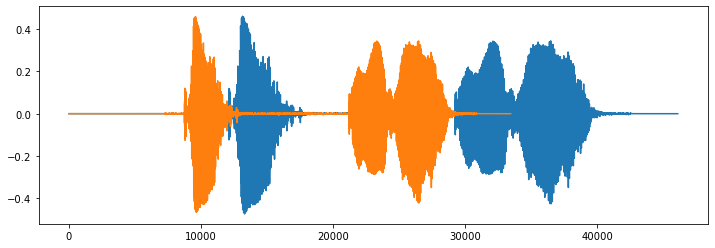

In [12]:
import matplotlib.pyplot as plt

# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(lib_audio)
plt.plot(sf_audio)

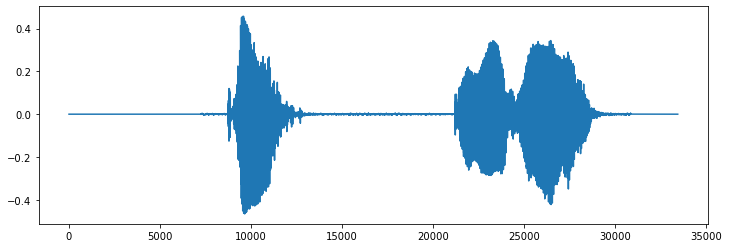

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(sf_audio)

(40, 91)


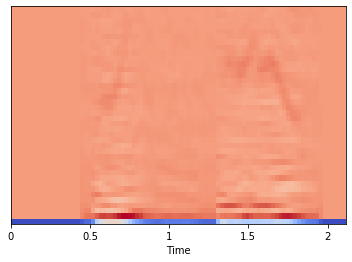

In [43]:
import librosa.display

mfccs = librosa.feature.mfcc(y=lib_audio, sr=lib_sr, n_mfcc=40)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=lib_sr, x_axis='time')

In [44]:
mfccsscaled = np.mean(mfccs.T,axis=0)
mfccsscaled.shape

(40,)

In [2]:
import re

def create_character_mapping():

    character_map = {' ': 0}

    for i in range(97, 123):
        character_map[chr(i)] = len(character_map)

    return character_map

def label_idx(label):
    
    char_2_idx = create_character_mapping() 
    
    label = ' '.join(re.split('[^a-z]', label.lower()[:-1])) #only take alpha and ignore /n at the end of a sentence
    
    vector = [char_2_idx[char] for char in label] #convert string to vector of index
    
    return vector

In [3]:
def clean_ipynb_folder_if_exists(folder):
    
    folder = pathlib.Path(folder)
    ipynb_paths = [str(item) for item in folder.glob('**/*') if item.is_dir() and item.name.startswith('.ipynb')]
    
    if len(ipynb_paths) > 0:
        
        for eachdir in ipynb_paths:
            shutil.rmtree(eachdir)
            print("Removed", eachdir)
    else:
        
        print('No .ipynb_checkpoints to remove')


In [4]:
def create_main_metadata(SRC, DST):
    clean_ipynb_folder_if_exists(SRC)
    walk_dir = list(os.walk(SRC))

    i = 0
    
    if not os.path.exists(DST):
        os.makedirs(DST)
    
    with open(os.path.join(DST, 'metadata.csv'), 'w', newline='') as metadata:
        
        metadata_writer = csv.DictWriter(metadata, delimiter=',', fieldnames=['index','filepath', 'label', 'label_length', 'spec_length'])
        metadata_writer.writeheader()
    
        for root, dirs, metas in tqdm(walk_dir):

            for meta in metas:

                if meta[-4:] == '.txt':
                    with open(os.path.join(root, meta), 'r') as f:

                        for line in f.readlines():


                            name, label = line.split(' ', 1) 
                            path = os.path.join(root, name + '.flac')
                            
                            spec_length = extract_features(path).shape[1]
                            label = label_idx(label)
                            
                            metadata_writer.writerow({
                                'index':i,
                                'filepath': path,
                                'label': label,
                                'label_length': len(label),
                                'spec_length': spec_length
                            })

                            if i % 100 == 0:
                                print('The number files is processed: ', i)
                            i += 1

        print('Number of processed file', i)

In [5]:
def _float_feature(list_of_floats):  # float32
    return tf.train.Feature(float_list=tf.train.FloatList(value=list_of_floats))


def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))


def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path) 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_path)
        return None 
    
    return mfccs



class TFRecordsConverter:
    """Convert audio to TFRecords."""
    def __init__(self, meta, output_dir, n_shards_train, n_shards_test,
                 n_shards_val, test_size, val_size):
        self.output_dir = output_dir
        self.n_shards_train = n_shards_train
        self.n_shards_test = n_shards_test
        self.n_shards_val = n_shards_val

        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
        
        df = pd.read_csv(meta, index_col=0)
        # Shuffle data by "sampling" the entire data-frame
        self.df = df.sample(frac=1, random_state=101)
        self.max_input_len = self.df.spec_length.max()
        self.max_label_len = self.df.label_length.max()
        
        n_samples = len(df)
        self.n_test = np.ceil(n_samples * test_size)
        self.n_val = np.ceil(n_samples * val_size)
        self.n_train = n_samples - self.n_test - self.n_val

    def _get_shard_path(self, split, shard_id, shard_size):
        return os.path.join(self.output_dir,
                            '{}-{:03d}-{}.tfrecord'.format(split, shard_id,
                                                           shard_size))

    def _write_tfrecord_file(self, shard_path, indices):
        """Write TFRecord file."""
        with tf.io.TFRecordWriter(shard_path, options='ZLIB') as out:
            for index in indices:
                index = int(index)
                file_path = self.df.filepath.iloc[index]
                
                label = eval(self.df.label.iloc[index])
                if len(label) < self.max_label_len:
                    offset = self.max_label_len - len(label)
                    padding = [0 for _ in range(offset)]
                    label = label + padding
                
                feature = extract_features(file_path)
                feature = pad_sequences(feature, maxlen= self.max_input_len, padding = 'post')
                
                
                # Example is a flexible message type that contains key-value
                # pairs, where each key maps to a Feature message. Here, each
                # Example contains two features: A FloatList for the decoded
                # audio data and an Int64List containing the corresponding
                # label's index.
                example = tf.train.Example(features=tf.train.Features(feature={
                    'feature': _float_feature(feature.flatten().tolist()),
                    'label': _int64_feature(label)}))

                out.write(example.SerializeToString())

    def convert(self):
        """Convert to TFRecords.
        Partition data into training, testing and validation sets. Then,
        divide each data set into the specified number of TFRecords shards.
        """
        splits = ('train', 'test', 'validate')
        split_sizes = (self.n_train, self.n_test, self.n_val)
        split_n_shards = (self.n_shards_train, self.n_shards_test,
                          self.n_shards_val)

        offset = 0
        for split, size, n_shards in zip(splits, split_sizes, split_n_shards):
            
            print('Converting {} set into TFRecord shards...'.format(split))
            shard_size = np.ceil(size / n_shards)
            cumulative_size = offset + size
            
            for shard_id in range(1, n_shards + 1):
                
                step_size = min(shard_size, cumulative_size - offset)
                shard_path = self._get_shard_path(split, shard_id, step_size)
                
                # Generate a subset of indices to select only a subset of
                # audio-files/labels for the current shard.
                file_indices = np.arange(offset, offset + step_size)
                self._write_tfrecord_file(shard_path, file_indices)
                offset += step_size

        print('Number of training examples: {}'.format(self.n_train))
        print('Number of testing examples: {}'.format(self.n_test))
        print('Number of validation examples: {}'.format(self.n_val))
        print('TFRecord files saved to {}'.format(self.output_dir))

In [7]:
SRC = '../../data/dev-clean'
DST = '../../data/dev_clean_final'

create_main_metadata(SRC, DST)

  0%|          | 0/138 [00:00<?, ?it/s]

No .ipynb_checkpoints to remove
The number files is processed:  0


  4%|▍         | 6/138 [00:14<05:38,  2.57s/it]

The number files is processed:  100


  7%|▋         | 10/138 [00:25<06:07,  2.87s/it]

The number files is processed:  200


  9%|▉         | 13/138 [00:38<07:27,  3.58s/it]

The number files is processed:  300


 13%|█▎        | 18/138 [00:50<05:54,  2.95s/it]

The number files is processed:  400


 16%|█▌        | 22/138 [00:59<04:50,  2.50s/it]

The number files is processed:  500


 20%|█▉        | 27/138 [01:13<05:24,  2.92s/it]

The number files is processed:  600


 23%|██▎       | 32/138 [01:30<05:27,  3.09s/it]

The number files is processed:  700


 27%|██▋       | 37/138 [01:43<05:08,  3.06s/it]

The number files is processed:  800


 32%|███▏      | 44/138 [02:01<04:24,  2.81s/it]

The number files is processed:  900


 36%|███▌      | 49/138 [02:14<04:03,  2.73s/it]

The number files is processed:  1000


 40%|███▉      | 55/138 [02:27<03:14,  2.35s/it]

The number files is processed:  1100


 44%|████▍     | 61/138 [02:47<05:03,  3.95s/it]

The number files is processed:  1200


 49%|████▉     | 68/138 [03:07<03:14,  2.78s/it]

The number files is processed:  1300


 53%|█████▎    | 73/138 [03:24<03:19,  3.08s/it]

The number files is processed:  1400


 57%|█████▋    | 78/138 [03:37<02:52,  2.88s/it]

The number files is processed:  1500


 60%|██████    | 83/138 [03:51<02:37,  2.85s/it]

The number files is processed:  1600


 64%|██████▍   | 88/138 [04:05<02:20,  2.82s/it]

The number files is processed:  1700


 66%|██████▌   | 91/138 [04:11<02:01,  2.58s/it]

The number files is processed:  1800


 72%|███████▏  | 99/138 [04:30<01:22,  2.12s/it]

The number files is processed:  1900


 75%|███████▍  | 103/138 [04:49<02:09,  3.71s/it]

The number files is processed:  2000


 78%|███████▊  | 107/138 [04:59<01:47,  3.47s/it]

The number files is processed:  2100


 82%|████████▏ | 113/138 [05:19<01:22,  3.31s/it]

The number files is processed:  2200


 83%|████████▎ | 115/138 [05:29<01:28,  3.85s/it]

The number files is processed:  2300


 88%|████████▊ | 121/138 [05:50<00:59,  3.53s/it]

The number files is processed:  2400


 93%|█████████▎| 128/138 [06:10<00:29,  2.93s/it]

The number files is processed:  2500


 98%|█████████▊| 135/138 [06:26<00:08,  2.73s/it]

The number files is processed:  2600


 99%|█████████▊| 136/138 [06:30<00:05,  3.00s/it]

The number files is processed:  2700


100%|██████████| 138/138 [06:40<00:00,  2.90s/it]

Number of processed file 2703


In [8]:
meta = pd.read_csv(os.path.join(DST,'metadata.csv'), index_col = 'index')

print(meta.shape)
display(meta.head())

(2703, 4)


,filepath,label,label_length,spec_length
index,,,,
0,../../data/dev-clean/84/121123/84-121123-0000....,"[7, 15, 0, 4, 15, 0, 25, 15, 21, 0, 8, 5, 1, 18]",14,91
1,../../data/dev-clean/84/121123/84-121123-0001....,"[2, 21, 20, 0, 9, 14, 0, 12, 5, 19, 19, 0, 20,...",83,172
2,../../data/dev-clean/84/121123/84-121123-0002....,"[1, 20, 0, 20, 8, 9, 19, 0, 13, 15, 13, 5, 14,...",265,590
3,../../data/dev-clean/84/121123/84-121123-0003....,"[1, 14, 4, 0, 20, 8, 5, 0, 3, 18, 25, 0, 9, 19...",85,293
4,../../data/dev-clean/84/121123/84-121123-0004....,"[4, 0, 1, 22, 18, 9, 7, 14, 25, 0, 18, 21, 19,...",79,190


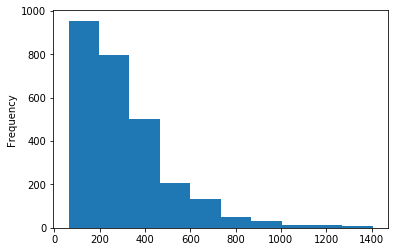

In [9]:
meta.spec_length.plot(kind='hist')

In [10]:
converter = TFRecordsConverter(meta = os.path.join(DST,'metadata.csv'), 
                   output_dir = os.path.join(DST,'TFrecords'), 
                   n_shards_train = 2, 
                   n_shards_test = 1, 
                   n_shards_val = 1, 
                   test_size = 0.2, 
                   val_size = 0.2)

converter.convert()

Converting train set into TFRecord shards...
Converting test set into TFRecord shards...
Converting validate set into TFRecord shards...
Number of training examples: 1621.0
Number of testing examples: 541.0
Number of validation examples: 541.0
TFRecord files saved to ../../data/dev_clean_final/TFrecords
